## Distant reading course week 1 (VT-23, Matti La Mela)

### Learning material 1c: Tokenization, lemmatization, POS-tagging

In this learning material, we will use SpaCy to tokenize text data and perform selected operations of data curation to the text.

The reference readings for this learning material is:

o SpaCy.io, 2019, URL: https://spacy.io/usage/

### 1. Starting to work with spaCy

In [1]:
# In this exercise we will use spacy, so we import the library and also the English language model.

import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
# We read again Jane Austen's novel Pride and Prejudice into a string variable, and process it a bit (partly based on the previous Material_1b)
# The novel is from Project Gutenberg: https://www.gutenberg.org/ebooks/42671

with open("./texts_week1/pride_and_prejudice.txt", mode="r", encoding="utf-8") as file:
    text = file.read()

text = text.replace("\n", " ")  # remove all endlines \n

# We take the first chapter of the novel: opening the txt file and using the typeset of the chapter headings (could be also the first sentence
# of the chapter or similar.

start = text.index("CHAPTER I.")
end = text.index("CHAPTER II.")

chapter1 = text[start+13:end]  # we add 13 characters to get over the "CHAPTER I.  " to the beginning of the chapter.



In [3]:
# let's see how long our string is!

print("Our string 'chapter1' contains " + str(len(chapter1)) + " characters.")

# The first 100 chars are like this:

print(chapter1[0:100])


Our string 'chapter1' contains 4488 characters.
It is a truth universally acknowledged, that a single man in possession of a good fortune, must be i


In [4]:
# We take next our "chapter one" to spacy by calling the nlp() function. It creates a specific spaCy Doc object, which has a Doc datatype.

doc = nlp(chapter1)

type(doc)


spacy.tokens.doc.Doc

### spaCy nlp() pipeline

What does nlp() then do? It first tokenizes the text on which it is called and produces the so-called Doc object. This Doc object is then processed through the spaCy nlp pipeline (see below), which assigns many kinds of relevant information to the tokens, including lemmas (base forms), part-of-speech tags (noun, adjective etc.), and even labels of the named entities that are identified among the tokens. 

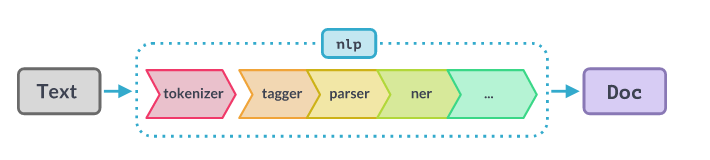

https://spacy.io/usage/spacy-101

How well the pipeline performs depends on the language and statistical models that are part of the pipeline components.

In [5]:
# The nlp() pipeline tokenizes the text for us in the Doc object. This can be understood as a list of Spacy tokens.
# It does the tokenization according to language rules, thus separates sentence-related punctuation but not punctuation part of words,
# . U.K. When we use the index, we see that it is ordered by token that is by word or punctuation), and not per character like a string variable.

# We use .text attribute, because we want to get the string value of the token. With other attributes we can get other tags related to the particular token

print(doc[0].text)
print(doc[1].text)
print(doc[2].text)



It
is
a


In [6]:
# We can also navigate through the spacy Doc by sentence, for example, if we want to tokenize by sentence.
# Here we create a list variable with the sentences.

text_sentences = []

for sentence in doc.sents:
    text_sentences.append(sentence)

print("The second sentence is: " + str(text_sentences[1]))


The second sentence is: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.  


### 2. Filtering our text with spacy: alphanumerical words & stopwords

Filtering is a rather straight-forward operation, as spaCy has already assigned in the nlp() pipeline relevant linguistic and semantic information to the tokens in our text. We will take use of this information when we further process our data. We do two things: we first select only alphanumerical tokens (so leave punctuation out) and then filter out stopwords.

In [7]:
# spaCy has marked the information about being alphanumerical to the tokens. This is in the attribute .is_alpha.
# If the value of .is_alpha is true, the token is an alphanumerical token.

list_alphanumerical = []
list_others = []

# We use the for loop and if statement. For loop goes through all the tokens in our doc.
# if a token.is_alpha is true, it will add the token to our list. Else: we put it on the other list, "list_others"

for token in doc:
    if token.is_alpha:
        list_alphanumerical.append(token)
    else:
        list_others.append(token)

print("Some examples of alphanumerical tokens on our list: " + str(list_alphanumerical[0:15]))

# if you want, you can print what is in the "trash", thus punctuation or other tokens which are not oly alphanumericalthat is not alphanumerical.
# this you do with:
#

# print(list_others)

# looks like things we don't really need.. at the same time, it seems that there are some "'s" and "'ve" that go missing. We should check our preprocessing,
# are there for example extra spaces there?
#
# by the way, some people study punctuation!
# eg. Baunvig et al. (2021): Emotial Imprints: Exclamation Marks in N.F.S. Grundtvig's Writings, http://ceur-ws.org/Vol-2865/short7.pdf


Some examples of alphanumerical tokens on our list: [It, is, a, truth, universally, acknowledged, that, a, single, man, in, possession, of, a, good]


In [8]:
# We continue with our list of alphanumerical words and remove next the stop words. Our focus is only on the words that have more semantic
# information for us.

# Like with alphanumerical words above, spaCys nlp() has also marked the tokens based on whether they are stop words or not with attribute .is_stop.
# We use again a for loop to go through our list:

list_nonstop = []

for token in list_alphanumerical:        # we go through our list, the values are assigned to "token" in a sequential order
    if token.is_stop:                    # if token taken from our list is a stop word, 
        list_others.append(token)        # we append it to the list of "others"
    else:
        list_nonstop.append(token)       # else: it has to be a non-stop word, thus we add it to our list of words that are relevant (thus not stop words)

print("Some examples of alphanum & non-stop words on our list: " + str(list_nonstop[0:10]))

# We added the stop words to our "others" list, where we had our punctuation words too. If you want, you can print it again to see what we have removed.

# print(list_others)

# Are there words that you think could be still useful, thus contain information for certain type of analysis?
        

Some examples of alphanum & non-stop words on our list: [truth, universally, acknowledged, single, man, possession, good, fortune, want, wife]


In [9]:
## It is possible to modify the list of stop words. We see the default list here:

print(nlp.Defaults.stop_words)

# We could a stop word to the list with:
# nlp.Defaults.stop_words.add("this_stopword_needs_to_be_included")

# We could remove a stop word from the list with:
# nlp.Defaults.stop_words.remove("must")


{'’re', 'while', 'formerly', 'somehow', 'not', 'together', '‘s', 'enough', 'various', 'someone', 'alone', 'eleven', 'does', 'indeed', 'our', 'see', 'since', 'its', 'amount', 'where', 'whole', 'you', 'as', '‘d', '’d', 'did', 'meanwhile', 'done', 'yourselves', 'almost', 'your', 'toward', 'last', 'made', 'everything', 'one', 'get', 'hereafter', 'latter', 'bottom', 'third', 'we', '’s', 'yours', 'himself', 'for', 'are', 'else', 'therein', "'re", 'please', 'n’t', 'along', 'few', 'nine', 'herself', 'about', 'on', 'some', 'after', 'even', 'many', 'elsewhere', 'five', 'had', 'behind', 'well', 'or', 'this', 'amongst', 'the', 'less', 'very', 'whence', 'other', 'make', 'anywhere', 'when', 'ca', 'only', 'him', 'using', 'but', 'these', 'across', 'nobody', 'that', 'me', 'been', 'used', 'might', 'ten', 'how', 'became', "'s", 'until', 'during', 'such', 'often', 'each', 'around', 'without', 'of', 'now', 'then', 'part', 'either', 'down', 'namely', 'top', 'side', 'am', 'doing', 'seems', 'mostly', 'unless'

### 3. Lemmatizing our data with spaCy

We are almost ready to save our processed data. As we aim to study the most common words and thematic areas, it is useful to have the words in lemmatized form.

spaCy has done the lemmatization already with nlp(), and we find the lemma form in the tokens attribute token.lemma_.

In [10]:
# In this cell there is an example of how a sentence becomes lemmatized in spacy. You can hop over this to the next cell,
# if you want to continue with our data processing.

example = "There were three dogs and a flying duck"

example_doc = nlp(example)  # nlp() tokenizes the string and processes the result by adding tags and other information, including the lemma of the token.

for token in example_doc:
    print(token.lemma_)
    

there
be
three
dog
and
a
fly
duck


In [11]:
# As a final step, let's save the lemma form of our tokens in the list "list_nonstop", where we have the latest results of our data processing.
# As noted above, spaCy has stored the base forms in the tokens attribute .lemma_ 

result_lemmas = []

for token in list_nonstop:
    result_lemmas.append(token.lemma_)

# Let's see how the lemmatization for the first twenty words:

for i in range(0,20):
    print("(" + str(i) + ") lemmatized: " + list_nonstop[i].text + " ---> " + result_lemmas[i])
    
# Looks very good!

# PS. .text attribute returns the text form of the token, which is a string! token.lemma_ is a string! the tokens themselves are Spacy objects,
# and cannot be operated like string variables.

(0) lemmatized: truth ---> truth
(1) lemmatized: universally ---> universally
(2) lemmatized: acknowledged ---> acknowledge
(3) lemmatized: single ---> single
(4) lemmatized: man ---> man
(5) lemmatized: possession ---> possession
(6) lemmatized: good ---> good
(7) lemmatized: fortune ---> fortune
(8) lemmatized: want ---> want
(9) lemmatized: wife ---> wife
(10) lemmatized: little ---> little
(11) lemmatized: known ---> know
(12) lemmatized: feelings ---> feeling
(13) lemmatized: views ---> view
(14) lemmatized: man ---> man
(15) lemmatized: entering ---> enter
(16) lemmatized: neighbourhood ---> neighbourhood
(17) lemmatized: truth ---> truth
(18) lemmatized: fixed ---> fix
(19) lemmatized: minds ---> mind


In [12]:
# We are satisfied with the result and write our processed data to a text file, as instructed in the previous lesson Material_1b. eg.

with open("./texts_week1/output_lemmas.txt", mode="w", encoding="utf-8") as file:
    for lemma in result_lemmas:
        file.write(lemma)
        file.write("\n")

# You can now open the txt-file and compare it with the original file "crime_and_punishment_ch1.txt"

## Well done! I think we are (almost) done for this week..

### 4. Optional: POS-tagging with spacy

In [15]:
# spacy tags the tokens with POS-tags, which are stored in the token attribute .pos_

example = "There were three dogs and a flying duck"

example_doc = nlp(example)  # nlp() tokenizes the string and processes the result by adding tags and other information, including the lemma and the POS-tag of the token.

for token in example_doc:
    print(token.lemma_ + " === " + token.pos_)

    

there === PRON
be === VERB
three === NUM
dog === NOUN
and === CCONJ
a === DET
fly === VERB
duck === NOUN


In [14]:
# let's pick only verbs from the text we have been working on

# We continue with our list_nonstop

result_verbs = []

for token in list_nonstop:
    if token.pos_ == "VERB":
        result_verbs.append(token.lemma_)

print(result_verbs)

# done!

['acknowledge', 'know', 'enter', 'fix', 'surround', 'consider', 'say', 'hear', 'let', 'reply', 'return', 'tell', 'want', 'know', 'take', 'cry', 'want', 'tell', 'hear', 'know', 'say', 'take', 'come', 'agree', 'affect', 'reply', 'know', 'think', 'marry', 'settle', 'talk', 'fall', 'visit', 'come', 'send', 'like', 'flatter', 'pretend', 'grow', 'think', 'come', 'engage', 'assure', 'consider', 'think', 'know', 'visit', 'visit', 'dare', 'send', 'assure', 'throw', 'desire', 'humour', 'give', 'recommend', 'reply', 'abuse', 'vex', 'mistake', 'hear', 'mention', 'know', 'suffer', 'hope', 'live', 'come', 'come', 'visit', 'depend', 'visit', 'caprice', 'understand', 'develope', 'discontent', 'fancy', 'marry', 'visit']
